# Импорт библиотек

In [95]:
import numpy as np #библиотека для работы с многомерными массивами данных и математическими операциями над ними
import pandas as pd #библиотека для анализа и обработки данных
from typing import Dict, Tuple
from scipy import stats
import matplotlib.pyplot as plt #простое рисование графиков
import seaborn as sns #удобные дефолтные настройки графиков из matpotlib
from gmdhpy import gmdh
from gmdhpy.gmdh import MultilayerGMDH
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV, KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold, learning_curve, validation_curve
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor, GradientBoostingClassifier, GradientBoostingRegressor, BaggingClassifier, AdaBoostRegressor
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import lightgbm # сожрет все сырым и построит регрессионную модель, которая покажет важные фичи
                # чтобы дальше делать лабу только на них

%matplotlib inline
#для сохранения в ноутбуке вывода моих графиков

In [100]:
def print_stat(test_target, real_target):
    print(mean_absolute_error(test_target, real_target))
    print(mean_squared_error(test_target, real_target))
    print(median_absolute_error(test_target, real_target))

# Загрузка данных

In [43]:
data = pd.read_csv('./data/fifa19.csv')
data = data.drop(['ID', 'Photo', 'Flag', 'Club Logo'], axis=1)
data

Unnamed: 0                  Name  Age          Nationality  Overall  \
0               0              L. Messi   31            Argentina       94   
1               1     Cristiano Ronaldo   33             Portugal       94   
2               2             Neymar Jr   26               Brazil       92   
3               3                De Gea   27                Spain       91   
4               4          K. De Bruyne   27              Belgium       91   
5               5             E. Hazard   27              Belgium       91   
6               6             L. Modrić   32              Croatia       91   
7               7             L. Suárez   31              Uruguay       91   
8               8          Sergio Ramos   32                Spain       91   
9               9              J. Oblak   25             Slovenia       90   
10             10        R. Lewandowski   29               Poland       90   
11             11              T. Kroos   28              Germany       90   
12             12              D. Godín   32              Uruguay       90   
13             13           David Silva   32                Spain       90   
14             14              N. Kanté   27               France       89   
15             15             P. Dybala   24            Argentina       89   
16             16               H. Kane   24              England       89   
17             17          A. Griezmann   27               France       89   
18             18         M. ter Stegen   26              Germany       89   
19             19           T. Courtois   26              Belgium       89   
20             20       Sergio Busquets   29                Spain       89   
21             21             E. Cavani   31              Uruguay       89   
22             22              M. Neuer   32              Germany       89   
23             23             S. Agüero   30            Argentina       89   
24             24          G. Chiellini   33                Italy       89   
25             25             K. Mbappé   19               France       88   
26             26              M. Salah   26                Egypt       88   
27             27              Casemiro   26               Brazil       88   
28             28          J. Rodríguez   26             Colombia       88   
29             29            L. Insigne   27                Italy       88   
...           ...                   ...  ...                  ...      ...   
18177       18177             R. Roache   18  Republic of Ireland       48   
18178       18178          L. Wahlstedt   18               Sweden       48   
18179       18179           J. Williams   17              England       48   
18180       18180              M. Hurst   22             Scotland       48   
18181       18181              C. Maher   17  Republic of Ireland       48   
18182       18182               Y. Góez   18             Colombia       48   
18183       18183         K. Pilkington   44              England       48   
18184       18184             D. Horton   18              England       48   
18185       18185              E. Tweed   19  Republic of Ireland       48   
18186       18186          Zhang Yufeng   20             China PR       47   
18187       18187             C. Ehlich   19              Germany       47   
18188       18188            L. Collins   17                Wales       47   
18189       18189            A. Kaltner   18              Germany       47   
18190       18190            L. Watkins   18              England       47   
18191       18191  J. Norville-Williams   18              England       47   
18192       18192             S. Squire   18              England       47   
18193       18193            N. Fuentes   18                Chile       47   
18194       18194              J. Milli   18                Italy       47   
18195       18195            S. Griffin   18  Republic of Ireland       47   
18196       18196           K

Этот набор данных создан для прогнозирования Цены футболиста.

Содержание

Набор данных содержит несколько параметров, которые считаются важными во время оценки уровня счастья.
Включенные параметры:  
    1. Имя
    2. Возраст
    3. Гражданство
    4. Клуб
    5. Характеристики (набор числовых значений в различных столбцах)
    6. Позиция (один из нескольких столбцов)
    7. Репутация
    8. Название клуба, который его арендовал
     и др.

Целевой признак:
    1. Цена

In [44]:
data.shape

(18207, 85)

В нашем наборе данных 18207 строк и 89 столбцов. Посмотрим тип данных:

In [45]:
data.dtypes

Unnamed: 0                    int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                           object
ST                           object
RS                           object
LW                          

Посмотрим, есть ли пропущенные значения в данных:

In [46]:
data.isnull().sum()

Unnamed: 0                      0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF            

Если признак не числовой, сделаем его категориальным, а после - закодируем

In [47]:
for column in data.select_dtypes(include = ['object']).columns.tolist():
    data[column] = data[column].astype('category')
data.head()

Unnamed: 0               Name  Age Nationality  Overall  Potential  \
0           0           L. Messi   31   Argentina       94         94   
1           1  Cristiano Ronaldo   33    Portugal       94         94   
2           2          Neymar Jr   26      Brazil       92         93   
3           3             De Gea   27       Spain       91         93   
4           4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special  ... Composure  Marking  \
0         FC Barcelona  €110.5M  €565K     2202  ...      96.0     33.0   
1             Juventus     €77M  €405K     2228  ...      95.0     28.0   
2  Paris Saint-Germain  €118.5M  €290K     2143  ...      94.0     27.0   
3    Manchester United     €72M  €260K     1471  ...      68.0     15.0   
4      Manchester City    €102M  €355K     2281  ...      88.0     68.0   

   StandingTackle  SlidingTackle GKDiving GKHandling GKKicking GKPositioning  \
0            28.0           26.0      6.0       11.0      15.0          14.0   
1            31.0           23.0      7.0       11.0      15.0          14.0   
2            24.0           33.0      9.0        9.0      15.0          15.0   
3            21.0           13.0     90.0       85.0      87.0          88.0   
4            58.0           51.0     15.0       13.0       5.0          10.0   

   GKReflexes Release Clause  
0         8.0        €226.5M  
1        11.0        €127.1M  
2        11.0        €228.1M  
3        94.0        €138.6M  
4        13.0        €196.4M  

[5 rows x 85 columns]

Нам необходимо убрать nan из колонок. Не буду использовать удаление пустых строк или столбцов, поскольку это может сильно ударить по точности модели (видим, что есть колонки, где очень много nan).

Буду использовать импьютацию константой для категориальных переменных, а для числовых - медианной.

In [48]:
for column in data.select_dtypes(include = ['int64', 'float64']).columns.tolist():
    data[column] = data[column].fillna(data[column].median())
for column in data.select_dtypes(include = ['category']).columns.tolist():
    data[column] = data[column].fillna(data[column].describe(include=['category'])['top'])
data.head()

Unnamed: 0               Name  Age Nationality  Overall  Potential  \
0           0           L. Messi   31   Argentina       94         94   
1           1  Cristiano Ronaldo   33    Portugal       94         94   
2           2          Neymar Jr   26      Brazil       92         93   
3           3             De Gea   27       Spain       91         93   
4           4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special  ... Composure  Marking  \
0         FC Barcelona  €110.5M  €565K     2202  ...      96.0     33.0   
1             Juventus     €77M  €405K     2228  ...      95.0     28.0   
2  Paris Saint-Germain  €118.5M  €290K     2143  ...      94.0     27.0   
3    Manchester United     €72M  €260K     1471  ...      68.0     15.0   
4      Manchester City    €102M  €355K     2281  ...      88.0     68.0   

   StandingTackle  SlidingTackle GKDiving GKHandling GKKicking GKPositioning  \
0            28.0           26.0      6.0       11.0      15.0          14.0   
1            31.0           23.0      7.0       11.0      15.0          14.0   
2            24.0           33.0      9.0        9.0      15.0          15.0   
3            21.0           13.0     90.0       85.0      87.0          88.0   
4            58.0           51.0     15.0       13.0       5.0          10.0   

   GKReflexes Release Clause  
0         8.0        €226.5M  
1        11.0        €127.1M  
2        11.0        €228.1M  
3        94.0        €138.6M  
4        13.0        €196.4M  

[5 rows x 85 columns]

Закодируем категориальные признаки числовыми значениями

In [49]:
le = LabelEncoder()

def CostCoding(x):
    if x[-1]=='K':
        x = float(x.lstrip('€').rstrip('KM'))/1000
    else:
        x = float(x.lstrip('€').rstrip('KM'))
    return x

data['Release Clause'] = data['Release Clause'].apply(lambda x: CostCoding(x))
data['Release Clause'] = data['Release Clause'].astype('float64')
for column in data.select_dtypes(include = ['category']).columns.tolist():
    le.fit(data[column])
    data[column] = le.transform(data[column])
#кодирование категориальных признаков
data.head(18207)

Unnamed: 0   Name  Age  Nationality  Overall  Potential  Club  Value  \
0               0   9632   31            6       94         94   212     16   
1               1   3153   33          123       94         94   326    195   
2               2  12508   26           20       92         93   435     18   
3               3   4136   27          139       91         93   375    190   
4               4   8617   27           13       91         92   374     12   
5               5   4419   27           13       91         91   134    213   
6               6   9640   32           35       91         91   470    182   
7               7   9841   31          158       91         91   212    201   
8               8  15417   32          139       91         91   470    154   
9               9   7775   25          136       90         93    61    183   
10             10  13855   29          122       90         90   214    195   
11             11  15794   28           59       90         90   470    193   
12             12   3476   32          158       90         90    61    140   
13             13   4129   32          139       90         90   374    172   
14             14  12232   27           55       89         90   134    177   
15             15  12962   24            6       89         94   326    207   
16             16   6232   24           46       89         91   583    204   
17             17    580   27           55       89         90    61    196   
18             18  11781   26           59       89         92   212    165   
19             19  15618   26           13       89         90   470    157   
20             20  15408   29          139       89         89   212    153   
21             21   4327   31          158       89         89   435    172   
22             22  11197   32           59       89         89   214    116   
23             23  14390   30            6       89         89   374    178   
24             24   5571   33           78       89         89   326     78   
25             25   8831   19           55       88         95   435    202   
26             26  11459   26           44       88         89   363    184   
27             27   3054   26           20       88         90   470    166   
28             28   7911   26           31       88         89   214    184   
29             29   9511   27           78       88         88   398    176   
...           ...    ...  ...          ...      ...        ...   ...    ...   
18177       18177  14022   18          126       48         69    80    188   
18178       18178   9896   18          144       48         65   177    151   
18179       18179   8180   17           46       48         64   407    151   
18180       18180  10832   22          131       48         58   556    130   
18181       18181   2677   17          126       48         66    92    151   
18182       18182  16790   18           31       48         65    63    151   
18183       18183   8930   44           46       48         48   122      0   
18184       18184   3527   18           46       48         55   362    130   
18185       18185   4659   19          126       48         59   188    151   
18186       18186  17107   20           30       47         64    73    171   
18187       18187   2462   19           59       47         59   547    130   
18188       18188   9342   17          161       47         62   406    171   
18189       18189    704   18           59       47         61   547    171   
18190       18190   9905   18           46       47         67   122    171   
18191       18191   7758   18           46       47         65   122    151   
18192       18192  15216   18           46       47         64   122    151   
18193       18193  12163   18           29       47         64   599    151   
18194       18194   7685   18           78       47         65   353    151   
18195       18195  14711   18          126       47      

Отмасштабирую данные от 0 до 1

In [50]:
MMSc = MinMaxScaler()
for column in data.columns.tolist():
    data[column] = MMSc.fit_transform(data[[column]])

In [51]:
data.head()

Unnamed: 0      Name       Age  Nationality   Overall  Potential      Club  \
0    0.000000  0.560228  0.517241     0.036810  1.000000   0.978723  0.326154   
1    0.000055  0.183389  0.586207     0.754601  1.000000   0.978723  0.501538   
2    0.000110  0.727505  0.344828     0.122699  0.958333   0.957447  0.669231   
3    0.000165  0.240563  0.379310     0.852761  0.937500   0.957447  0.576923   
4    0.000220  0.501192  0.379310     0.079755  0.937500   0.936170  0.575385   

      Value      Wage   Special  ...  Composure   Marking  StandingTackle  \
0  0.074074  0.657343  0.910836  ...   1.000000  0.329670        0.285714   
1  0.902778  0.517483  0.926935  ...   0.989247  0.274725        0.318681   
2  0.083333  0.384615  0.874303  ...   0.978495  0.263736        0.241758   
3  0.879630  0.342657  0.458204  ...   0.698925  0.131868        0.208791   
4  0.055556  0.461538  0.959752  ...   0.913978  0.714286        0.615385   

   SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
0       0.261364  0.056180    0.109890   0.155556       0.146067    0.075269   
1       0.227273  0.067416    0.109890   0.155556       0.146067    0.107527   
2       0.340909  0.089888    0.087912   0.155556       0.157303    0.107527   
3       0.113636  1.000000    0.923077   0.955556       0.977528    1.000000   
4       0.545455  0.157303    0.131868   0.044444       0.101124    0.129032   

   Release Clause  
0        0.992985  
1        0.557187  
2        1.000000  
3        0.607606  
4        0.861018  

[5 rows x 85 columns]

На текущий момент в наше выборке отсутсвуют пропуски и все категориальные признаки закодированы целочисленными значениями. Можем приступать к анализу данных.

# Анализ данных

Анализ данных начнем с построения матрицы корреляций:

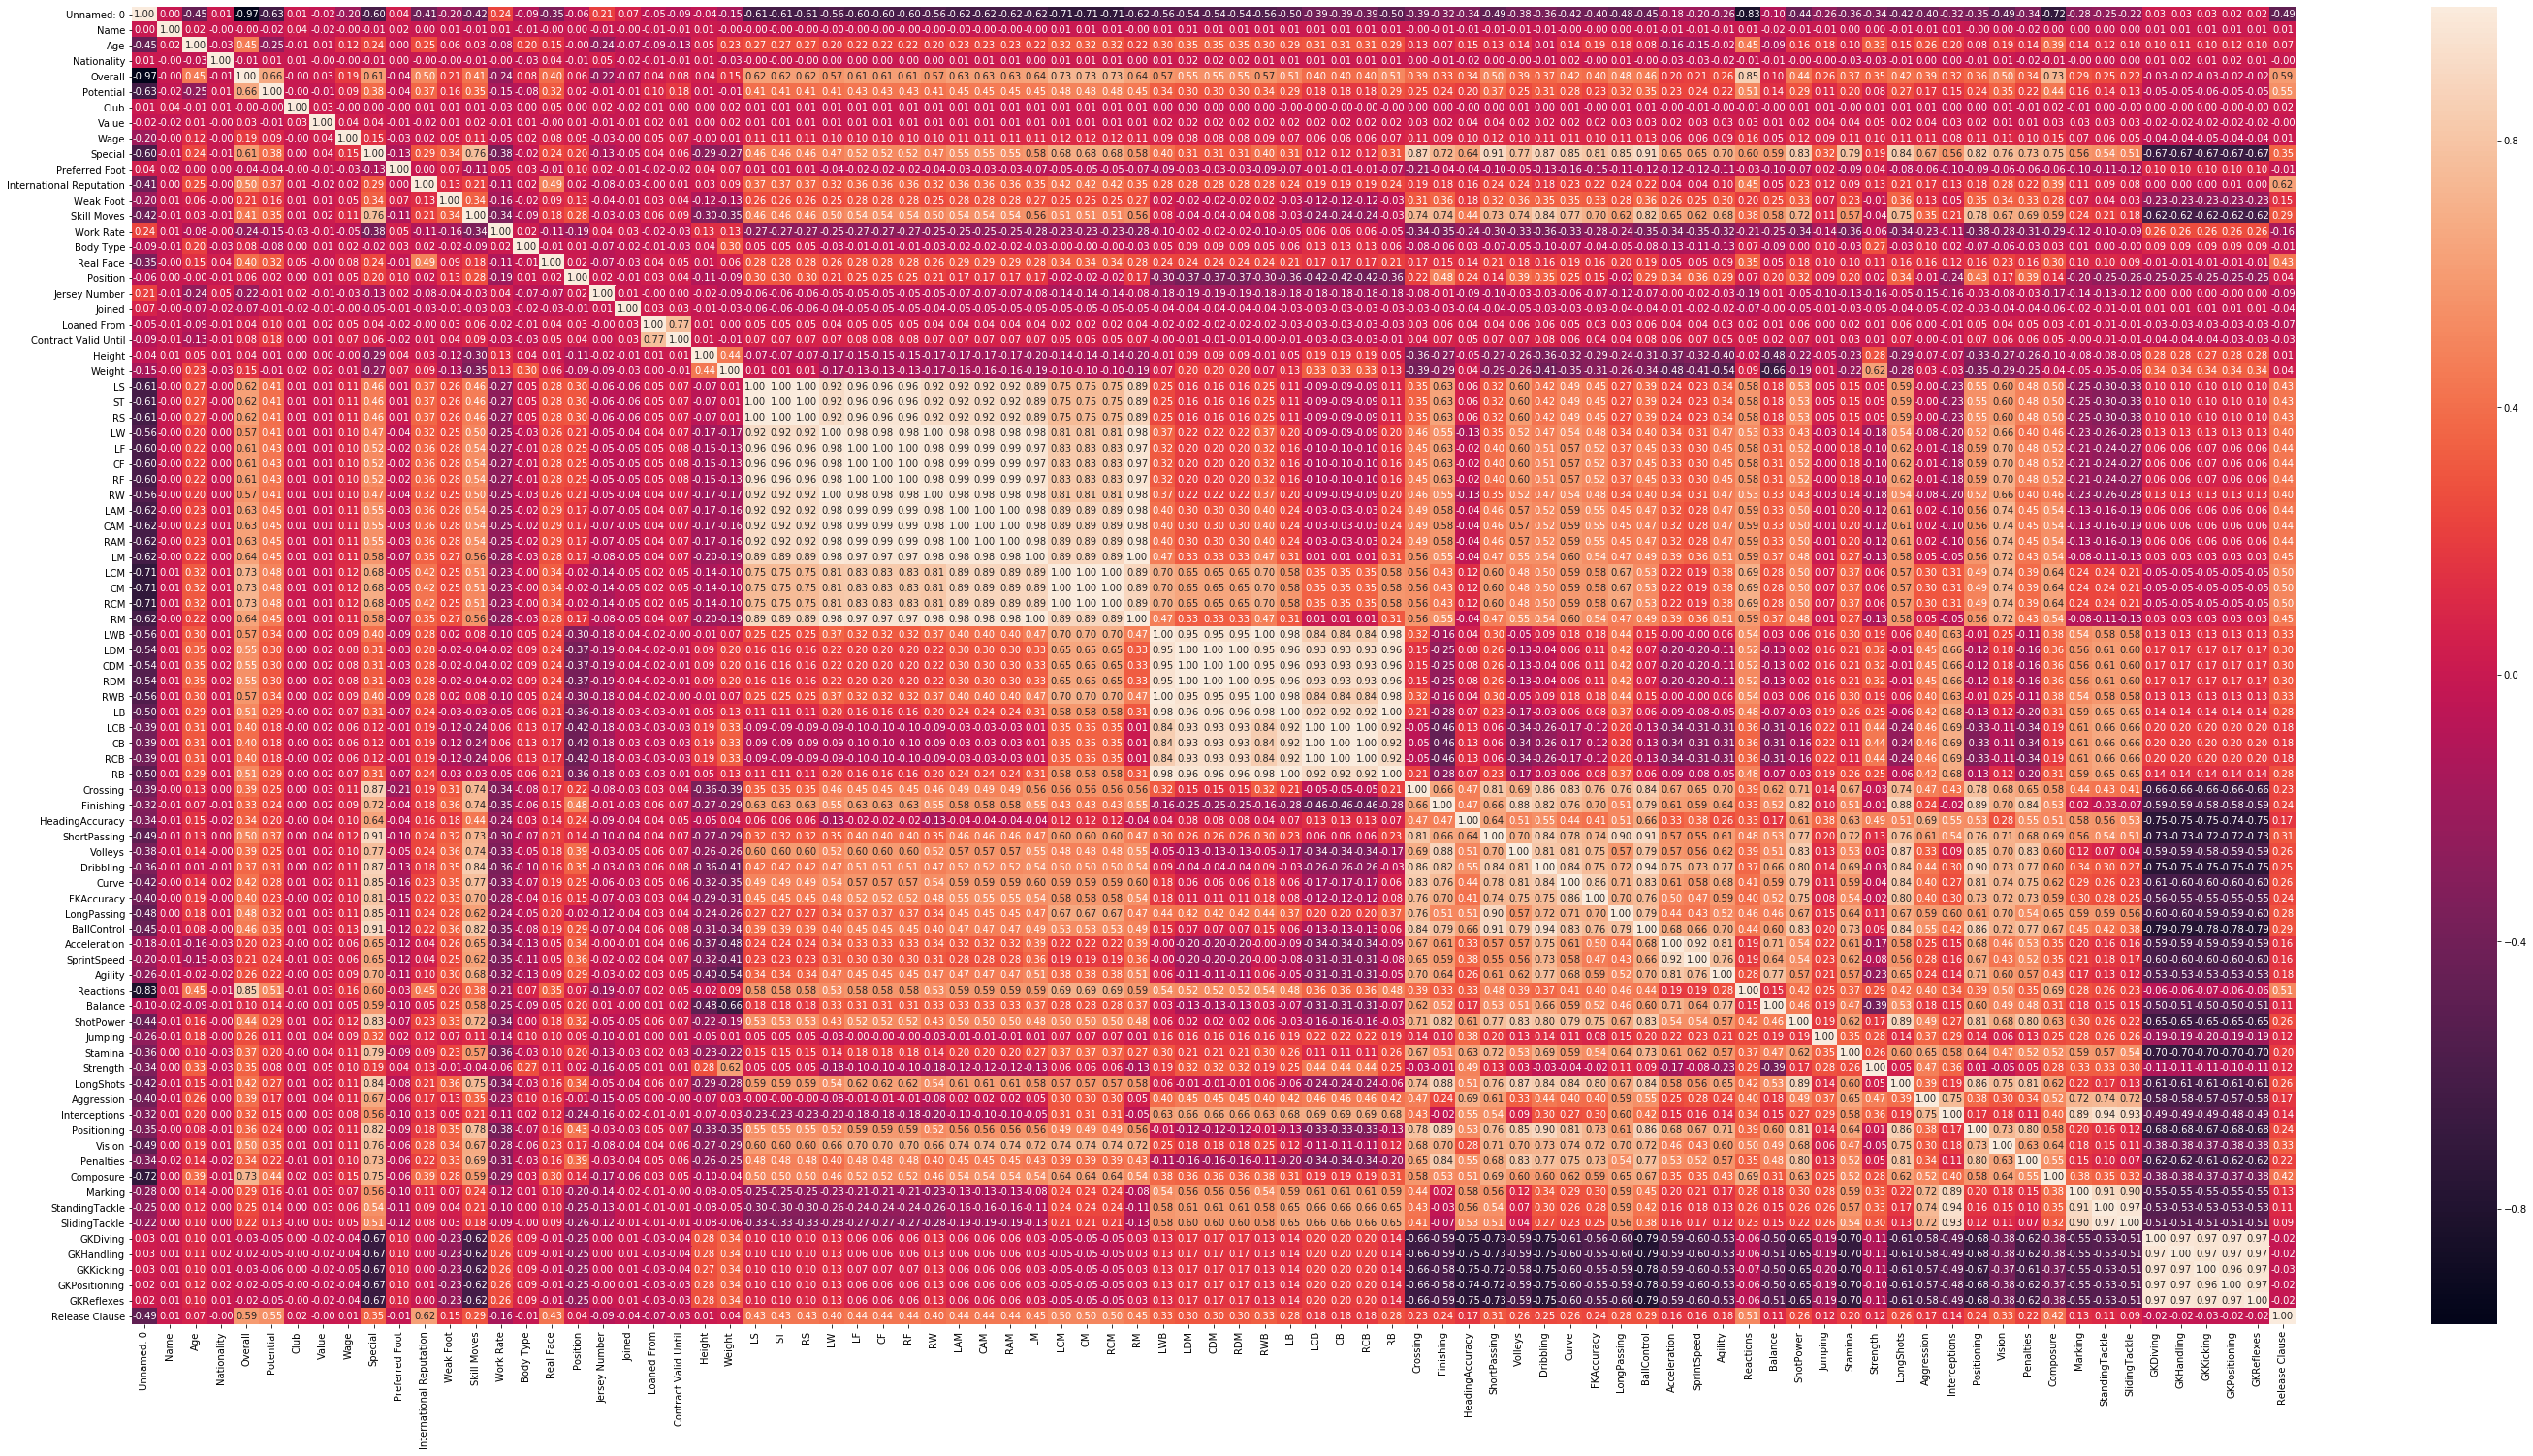

In [52]:
fig, ax = plt.subplots(figsize=(50,25))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Heh, mdaaaa

Удалю все фичи, корреляция которых с Целевой фичей будет примерно меньше 0.25 по модулю

In [53]:
lgbm_regressor = lightgbm.LGBMRegressor().fit(data.loc[:, data.columns != 'Release Clause'], data['Release Clause'])
list_of_importances = list(zip(data.loc[:, data.columns != 'Release Clause'].columns.tolist(), 
                               lgbm_regressor.feature_importances_))
list_of_importances = sorted(list_of_importances, key= lambda x: x[1], reverse= True) # список фич, отсортированных по важности
important_features = [x[0] for x in list_of_importances if x[1] >= 40]
important_features.extend(['Release Clause'])
data = data[important_features]
list_of_importances

[('Value', 310),
 ('Potential', 240),
 ('Unnamed: 0', 205),
 ('Age', 165),
 ('Wage', 147),
 ('Contract Valid Until', 141),
 ('Nationality', 125),
 ('Club', 100),
 ('Overall', 99),
 ('LF', 80),
 ('LS', 64),
 ('Reactions', 55),
 ('LCM', 50),
 ('Volleys', 48),
 ('Finishing', 46),
 ('Dribbling', 44),
 ('BallControl', 43),
 ('Composure', 43),
 ('LAM', 37),
 ('LongPassing', 37),
 ('Special', 35),
 ('LM', 34),
 ('GKDiving', 34),
 ('HeadingAccuracy', 32),
 ('Stamina', 32),
 ('LongShots', 30),
 ('Vision', 30),
 ('GKPositioning', 29),
 ('GKReflexes', 29),
 ('Real Face', 28),
 ('Crossing', 28),
 ('Curve', 26),
 ('Positioning', 26),
 ('Name', 25),
 ('Joined', 24),
 ('Jumping', 24),
 ('LCB', 23),
 ('FKAccuracy', 23),
 ('StandingTackle', 23),
 ('ShortPassing', 22),
 ('Agility', 22),
 ('LW', 20),
 ('LDM', 19),
 ('Interceptions', 19),
 ('Marking', 19),
 ('Jersey Number', 17),
 ('LWB', 17),
 ('International Reputation', 16),
 ('Loaned From', 16),
 ('GKHandling', 16),
 ('SlidingTackle', 15),
 ('Position

Теперь у нас есть только подходящие данные для анализа. Еще раз посмотрим на матрицу корреляций

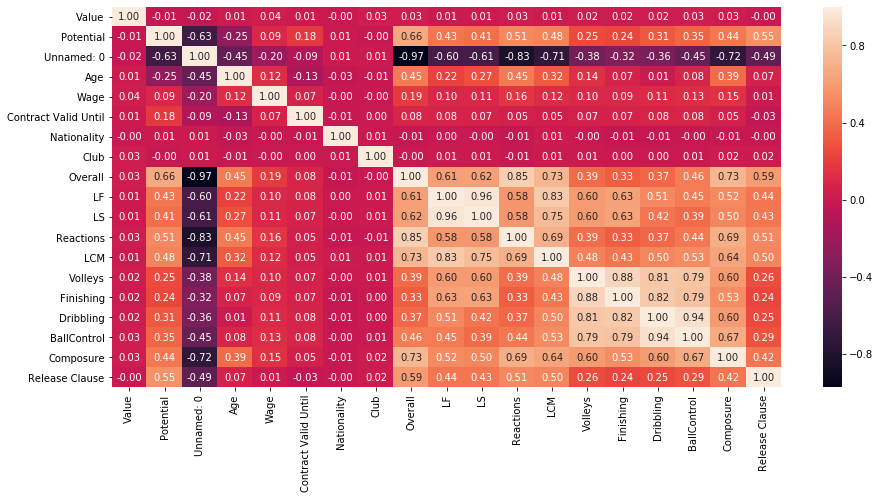

In [55]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Избавлюсь ещё от нескольких признаков, которые не заметила lgbm, но заметила Корр.Матрица

In [56]:
data = data.drop(['Value','Wage','Contract Valid Until','Nationality','Club','Unnamed: 0','Age'], axis=1)

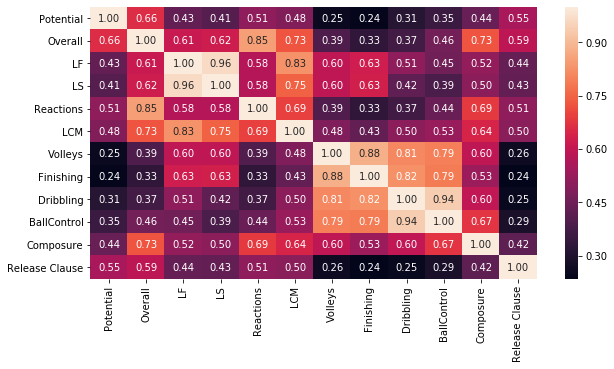

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Диаграмма рассеиваний показывает зависимость двух признаков:

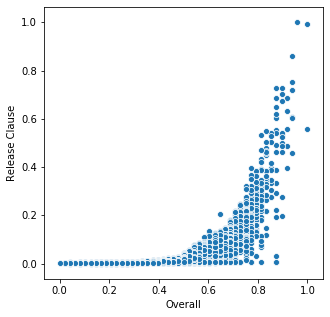

In [58]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='Overall', y='Release Clause', data=data)

Видна экспоненциальная зависимость.

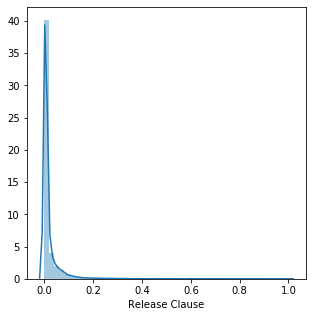

In [59]:
#Гистограмма Позволяет оценить плотность распределения данных
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['Release Clause'])

Посмотрим, как все признаки зависят между собой

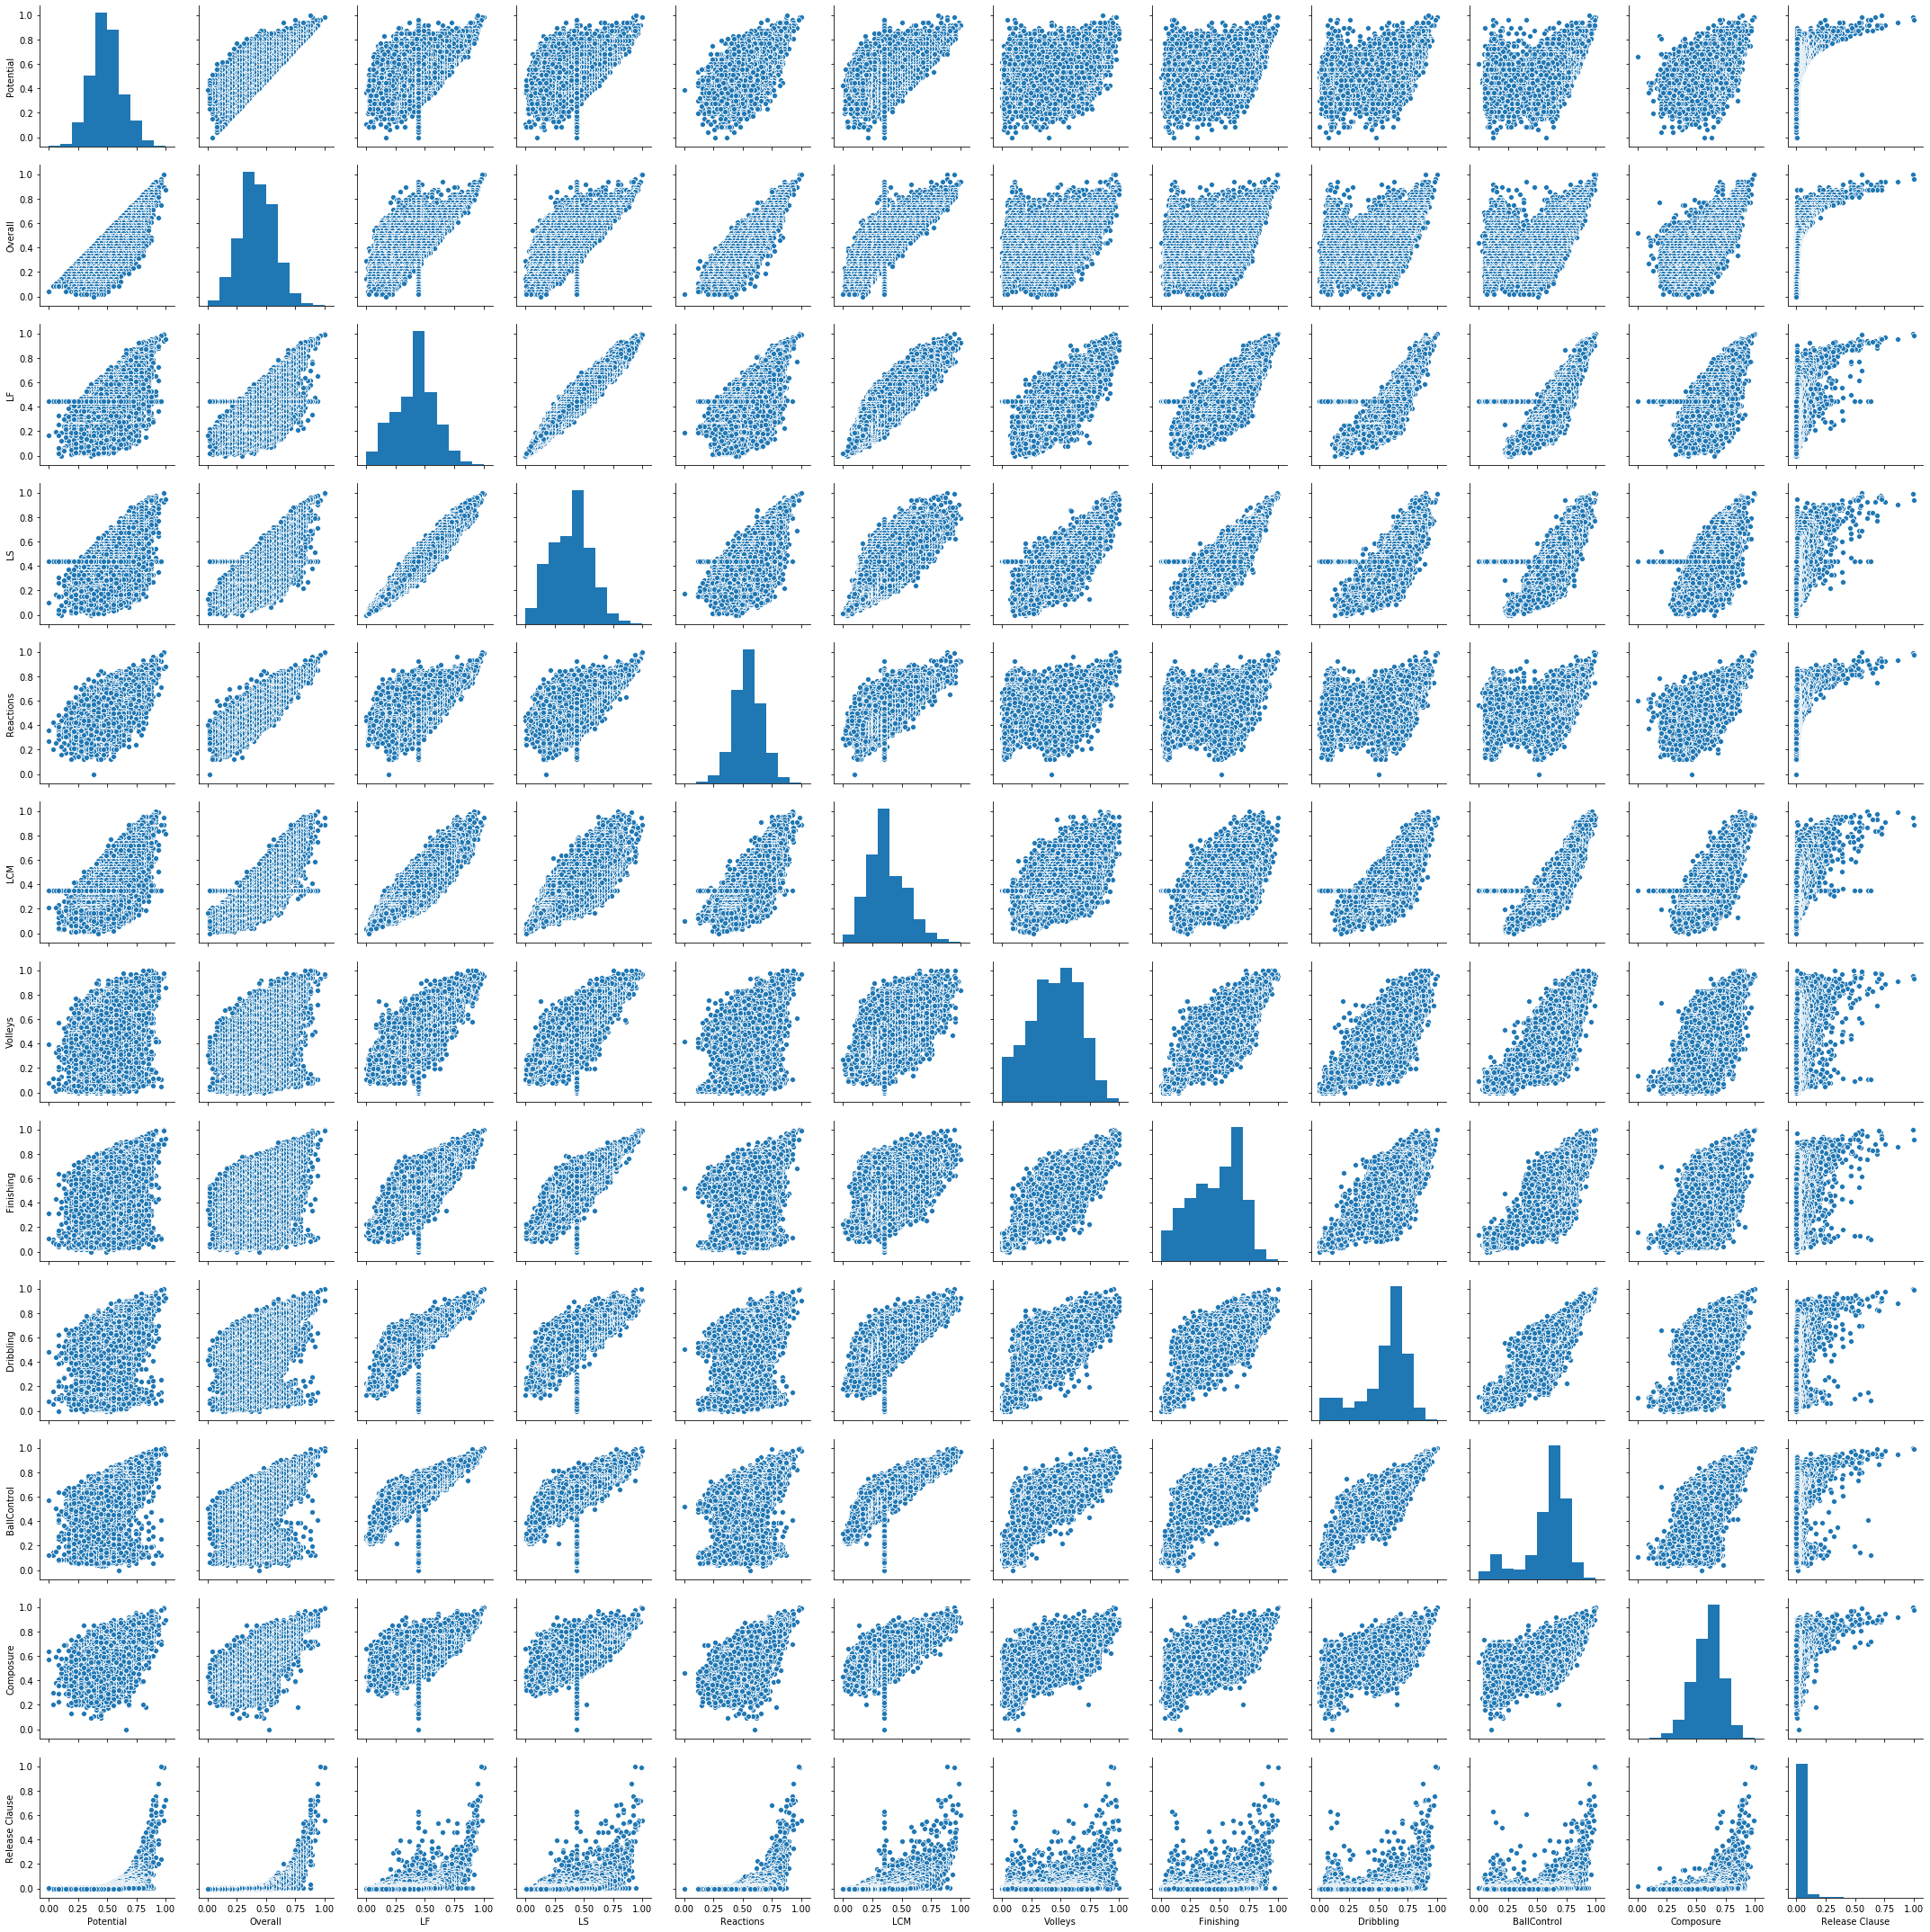

In [60]:
sns.pairplot(data)

Опять заметно, что некоторые данные находятся в нелинейной зависимости

# Разделение выборки

Для начала разделим целевой признак от остальных:

In [61]:
data_x = data.loc[:, data.columns != 'Release Clause']
data_y = data[['Release Clause']]

И теперь разделим на тренировочную выборку и тестовую, в тренировочной оставим 70% от всех данных

In [67]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_x, data_y, test_size=0.33, random_state=1)
data_X_train.shape, data_X_test.shape

((12198, 11), (6009, 11))

# Метод ближайших соседей

Начнем с одного из самых простых методов.

Сначала попробуем обучать на основе двух ближайших соседей

In [217]:
KNN1 = KNeighborsRegressor(n_neighbors=2)
KNN1.fit(data_X_train, data_y_train)
target_KNN1 = KNN1.predict(data_X_test)
target_KNN1

array([[0.00042089],
       [0.01726096],
       [0.00254947],
       ...,
       [0.00268976],
       [0.03984006],
       [0.00045816]])

In [218]:
print_stat(data_y_test, target_KNN1)
#средняя абсолютная ошибка при 2 сосядях
#средняя квадратичная ошибка при 2 сосядях
#медианная абсолютная ошибка при 2 соседях

0.00631380651923172
0.00034694691584392863
0.001315287587631035


Теперь с помощью кросс-валидации подберем гиперпараметр:

In [219]:
n_range = np.array(range(2,51,4))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50])}]

In [220]:
clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_absolute_error')
clf_gs.fit(data_X_train, data_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [221]:
clf_gs.best_params_

{'n_neighbors': 6}

In [222]:
#6 ближайших соседей
KNN2 = KNeighborsRegressor(n_neighbors=6)
KNN2.fit(data_X_train, data_y_train)
target_KNN2 = KNN2.predict(data_X_test)
target_KNN2

array([[0.00061161],
       [0.02244904],
       [0.00206208],
       ...,
       [0.00362289],
       [0.04524735],
       [0.00044939]])

In [223]:
print_stat(data_y_test, target_KNN_2)

#Было:
#0.00631380651923172
#0.00034694691584392863
#0.001315287587631035

#Стало лучше:

0.005551406067761183
0.0003131662338322637
0.0011041108582836084


Средняя абсолютная и квадратичная ошибка стали намного меньше

# Линейная модель

Некоторые данные находятся в линейной зависимости, поэтому попробуем линейную модель

In [121]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-x_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

Для начала найдем коэффициенты линейной зависимости и наглядно убедимся, насколько наша зависимость похожа на линейную

In [122]:
x_array = data[['LS']]
y_array = data[['Release Clause']]

In [123]:
df1 = pd.DataFrame(x_array)
df2 = pd.DataFrame(y_array)

In [124]:
b0, b1 = analytic_regr_coef(df1.values, df2.values)
b0, b1

(-0.02946060733603696, 0.12373310043946867)

In [125]:
# Вычисление значений y на основе x для регрессии
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [126]:
y_array_regr = y_regr(df1.values, b0, b1)

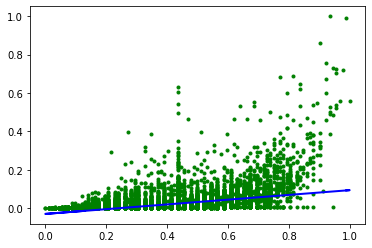

In [127]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()

Можно посмотреть, насколько данные близко к линии. Синими отрезками показаны ошибки между истинными и предсказанными значениями

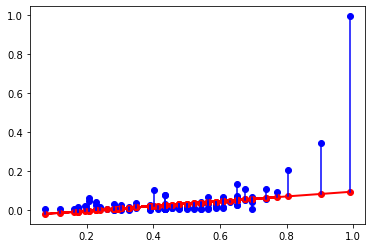

In [128]:
plt.plot(df1.values[0:10000:100], df2.values[0:10000:100], 'bo')
plt.plot(df1.values[0:10000:100], y_array_regr[0:10000:100], '-ro', linewidth=2.0)

for i in range(len(x_array[0:10000:100])):
    x1 = df1.values[0:10000:100][i]
    y1 = df2.values[0:10000:100][i]
    y2 = y_array_regr[0:10000:100][i]
    plt.plot([x1,x1],[y1,y2],'b-')

plt.show()

Попробуем обучить модель и предсказать значения:

In [129]:
LR1 = LinearRegression().fit(data_X_train, data_y_train)

In [130]:
target_LR1 = LR1.predict(data_X_test)

In [131]:
print_stat(data_y_test, target_LR1)

0.01841404221130518
0.0012439963515848984
0.013742501790125167


До подбора гиперпараметров наша модель показывает плохой результат

In [132]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(data_X_train, data_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

Кросс-валидация выбрала лучшими параметры. Подставим их.

In [136]:
LR2 = LinearRegression(copy_X = True, fit_intercept = False, normalize = True).fit(data_X_train, data_y_train)

In [137]:
target_LR2 = LR2.predict(data_X_test)

In [139]:
print_stat(data_y_test, target_LR2)

#Было:
#0.01841404221130518
#0.0012439963515848984
#0.013742501790125167

#практически ничего не поменялось, значит, линейная модель явно не подходит нашей ПО:

0.01913900992439537
0.0013765834253408437
0.013694985012512713


# Метод опорных векторов

In [160]:
xx = df1.values
yy = df2.values
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(xx.reshape(-1, 1), yy)
    y_pred = clf.predict(xx.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(xx, yy, 'b.')
    ax.plot(xx, y_pred, 'ro')
    plt.show()

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


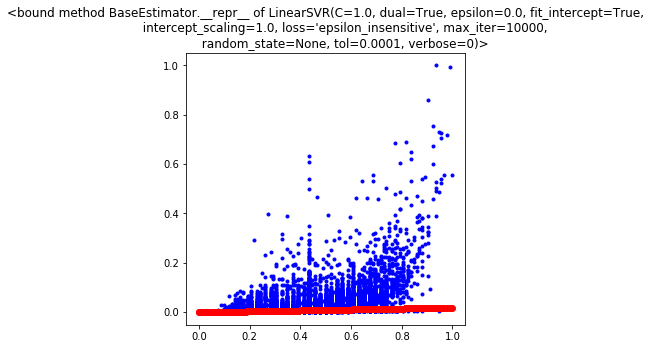

In [161]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


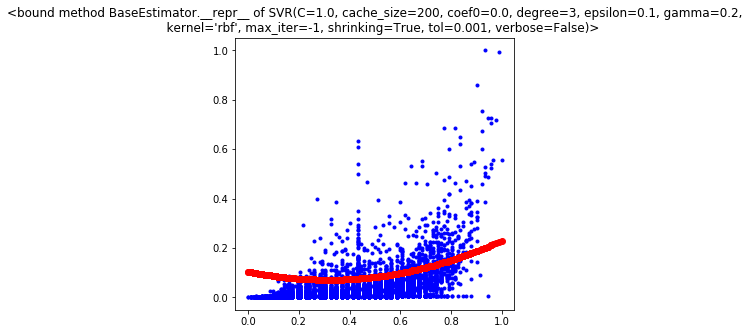

In [162]:
plot_regr(SVR(kernel='rbf', gamma=0.2, C=1.0))

In [163]:
SVR1 = SVR().fit(data_X_train, data_y_train)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [164]:
target_SVR1 = SVR1.predict(data_X_test)

In [165]:
print_stat(data_y_test, target_SVR1)

0.03918261227310407
0.0022940984952448448
0.03682178501495414


In [166]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVR(),param_grid,refit = True, verbose=2)
grid.fit(data_X_train, data_y_train)

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=linear ....................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.5s
[CV] C=10, gamma=1, kernel=linear ....................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.3s
[CV] C=10, gamma=1, kernel=linear ....................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.4s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=10, gamma=0.1, kernel=linear ..................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.4s
[CV] C=10, gamma=0.1, kernel=linear ..................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.4s
[CV] C=10, gamma=0.001, kernel=linear ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.3s
[CV] C=10, gamma=0.001, kernel=linear ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=1, kernel=linear, total=   1.1s
[CV] C=100, gamma=1, kernel=linear ...................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=1, kernel=linear, total=   1.2s
[CV] C=100, gamma=1, kernel=linear ...................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=1, kernel=linear, total=   1.4s
[CV] C=100, gamma=1, kernel=rbf ......................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=linear .................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100, gamma=0.1, kernel=linear, total=   1.1s
[CV] C=100, gamma=0.1, kernel=linear .................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100, gamma=0.1, kernel=linear, total=   1.3s
[CV] C=100, gamma=0.1, kernel=linear .................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100, gamma=0.1, kernel=linear, total=   1.4s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   1.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   1.3s
[CV] C=100, gamma=0.001, kernel=linear ...............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   1.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   1.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   1.7s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   2.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] ................... C=1000, gamma=1, kernel=linear, total=   8.0s
[CV] C=1000, gamma=1, kernel=linear ..................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   5.8s
[CV] C=1000, gamma=1, kernel=linear ..................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   7.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   5.6s
[CV] C=1000, gamma=0.1, kernel=linear ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   5.6s
[CV] C=1000, gamma=0.1, kernel=linear ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   8.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   5.6s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   6.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   6.9s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.2s

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] C=1000, gamma=0.001, kernel=rbf .................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   7.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   8.9s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   8.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  1.9min finished
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [167]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [171]:
SVR2 = SVR(C=1000, gamma = 0.001, kernel = 'rbf').fit(data_X_train, data_y_train)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
target_SVR2 = SVR2.predict(data_X_test)

In [174]:
print_stat(data_y_test, target_SVR2)

#Было:
#0.03918261227310407
#0.0022940984952448448
#0.03682178501495414

#Все стало гораздо лучше, но всё равно плохо, хуже, чем линейная модель!!!

0.03047600356857367
0.001656156261359265
0.025142337045255862


После подбора гиперпараметров метрики заметно улучшились. Посмотрим, как покажут себя более сложные модели

# Ансамблевые модели

# RandomForestRegressor

In [177]:
# data_x = data.loc[:, data.columns != 'Release Clause']
# data_y = data[['Release Clause']]
# df1 = pd.DataFrame(data_x)
# df2 = pd.DataFrame(data_y)

In [179]:
RFR1 = RandomForestRegressor(random_state=1).fit(data_X_train, data_y_train)

c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Artem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [180]:
target_RFR1 = RFR1.predict(data_X_test)

In [181]:
print_stat(data_y_test, target_RFR1)

0.004899101427321029
0.00027346637497344947
0.0009250957384237517


In [185]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3]}

In [186]:
CV_rfr = GridSearchCV(RandomForestRegressor(), param_grid=tuned_parameters, cv=5, n_jobs=-1, verbose=1)

In [187]:
CV_rfr.fit(data_X_train, data_y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.0min finished
c:\program files\python37\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3],
   

In [188]:
CV_rfr.best_params_

{'max_depth': None, 'n_estimators': 700}

In [189]:
RFR2 = RandomForestRegressor(random_state=1, max_depth = None, n_estimators = 700)
RFR2.fit(data_X_train, data_y_train)

C:\Users\Artem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [190]:
target_RFR2 = RFR2.predict(data_X_test)

In [191]:
print_stat(data_y_test, target_RFR2)

#Было:
#0.004899101427321029
#0.00027346637497344947
#0.0009250957384237517

#Все стало чуть лучше... хотя точность изначально была неплохая: > 99.5% !!!

0.00460669094962358
0.0002566624006824704
0.0008576846533807103


# AdaBoost

In [192]:
ABR1 = AdaBoostRegressor(random_state=1, base_estimator = RandomForestRegressor(random_state=1, max_depth = 3, n_estimators = 500))
ABR1.fit(data_X_train, data_y_train)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=500,
                                                       n_jobs=None,
                                                       oob_score=False,
                          

In [193]:
target_ABR1 = ABR1.predict(data_X_test)

In [194]:
print_stat(data_y_test, target_ABR1)

0.009126237629093047
0.0003301234655932829
0.006254570383999151


In [196]:
parameters = {'n_estimators': (1, 2, 5), 'base_estimator__max_depth': (1, 2, 3)}

In [197]:
CV_ABR = GridSearchCV(ABR1, parameters)

In [198]:
CV_ABR.fit(data_X_train, data_y_train)

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                                              criterion='mse',
                                                                              max_depth=3,
                                                                              max_features='auto',
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                            

In [199]:
CV_ABR.best_params_

{'base_estimator__max_depth': 3, 'n_estimators': 5}

In [200]:
ABR2 = AdaBoostRegressor(random_state=1, base_estimator = RandomForestRegressor(random_state=1, max_depth = 3, n_estimators = 500), n_estimators = 5)
ABR2.fit(data_X_train, data_y_train)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=500,
                                                       n_jobs=None,
                                                       oob_score=False,
                          

In [202]:
target_ABR2 = ABR2.predict(data_X_test)

In [204]:
print_stat(data_y_test, target_ABR2)

#Было
#0.009126237629093047
#0.0003301234655932829
#0.006254570383999151

#Стало лучше.

0.007879655388251881
0.00032933231047914684
0.003904171936929344


# Метод группового учета аргументов

In [210]:
GMDH1 = MultilayerGMDH()

In [211]:
GMDH1.fit(data_X_train, data_y_train)
target_GMDH1 = GMDH1.predict(data_X_test)

c:\program files\python37\lib\site-packages\gmdhpy\data_preprocessing.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()
c:\program files\python37\lib\site-packages\gmdhpy\data_preprocessing.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_y = data_y.as_matrix()


train layer0 in 1.95 sec
train layer1 in 7.70 sec
train layer2 in 7.81 sec
train layer3 in 7.78 sec
train layer4 in 7.68 sec
train layer5 in 7.71 sec
train layer6 in 7.94 sec
train layer7 in 9.92 sec
train layer8 in 8.18 sec
train layer9 in 8.21 sec
train layer10 in 8.30 sec
train layer11 in 8.24 sec


c:\program files\python37\lib\site-packages\gmdhpy\data_preprocessing.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()


In [212]:
print_stat(data_y_test, target_GMDH_1)

0.005862110066783228
0.00025267746965485665
0.0023521028893151792


In [213]:
GMDH2 = MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 'cubic'), seq_type='random')
GMDH2.fit(data_X_train, data_y_train)
target_GMDH2 = GMDH2.predict(data_X_test)

c:\program files\python37\lib\site-packages\gmdhpy\data_preprocessing.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()
c:\program files\python37\lib\site-packages\gmdhpy\data_preprocessing.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_y = data_y.as_matrix()


train layer0 in 11.06 sec
train layer1 in 36.68 sec
train layer2 in 35.04 sec
train layer3 in 39.28 sec
train layer4 in 40.59 sec
train layer5 in 33.92 sec
train layer6 in 34.16 sec


c:\program files\python37\lib\site-packages\gmdhpy\data_preprocessing.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()


In [215]:
print_stat(data_y_test, target_GMDH2)

#Было
#0.005862110066783228
#0.00025267746965485665
#0.0023521028893151792

#Стало

0.006731036287392927
0.0002562126497196879
0.0034648578009456397


Модель показывает хорошие метрики, но до подбора гиперпараметров они были лучше

# Анализ

#1 - KNN
#2 - Линейная
#3 - Опорные векторы
#4 - Случайный лес
#5 - AdaBoost
#6 - Метод группового учета аргументов (GMDH)

In [224]:
d2 = [{"model_№": 1, "model": "KNN", "mean_absolute_error" : mean_absolute_error(data_y_test, target_KNN2), "median_absolute_error": median_absolute_error(data_y_test, target_KNN2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_KNN2)}, {"model_№": 2, "model": "LR","mean_absolute_error" : mean_absolute_error(data_y_test, target_LR2), "median_absolute_error": median_absolute_error(data_y_test, target_LR2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_LR2)}, {"model_№": 3, "model": "SVR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_SVR2), "median_absolute_error": median_absolute_error(data_y_test, target_SVR2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_SVR2)}, {"model_№": 4, "model": "RFR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_RFR2), "median_absolute_error": median_absolute_error(data_y_test, target_RFR2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_RFR2)}, {"model_№": 5, "model": "AB", "mean_absolute_error" : mean_absolute_error(data_y_test, target_ABR2), "median_absolute_error": median_absolute_error(data_y_test, target_ABR2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_ABR2)}, {"GS": 'после', "model_№": 6, "model": "GMDH", "mean_absolute_error" : mean_absolute_error(data_y_test, target_GMDH2), "median_absolute_error": median_absolute_error(data_y_test, target_GMDH2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_GMDH2)}  ]

In [225]:
dd2 = pd.DataFrame(d2)

In [226]:
print(dd2)

      GS  mean_absolute_error  mean_squared_error  median_absolute_error  \
0    NaN             0.005551            0.000313               0.001104   
1    NaN             0.019139            0.001377               0.013695   
2    NaN             0.030476            0.001656               0.025142   
3    NaN             0.004607            0.000257               0.000858   
4    NaN             0.007880            0.000329               0.003904   
5  после             0.006731            0.000256               0.003465   

  model  model_№  
0   KNN        1  
1    LR        2  
2   SVR        3  
3   RFR        4  
4    AB        5  
5  GMDH        6  


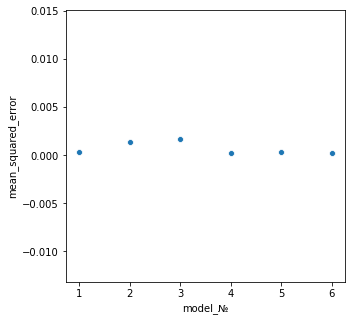

In [227]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='mean_squared_error', data=dd2)

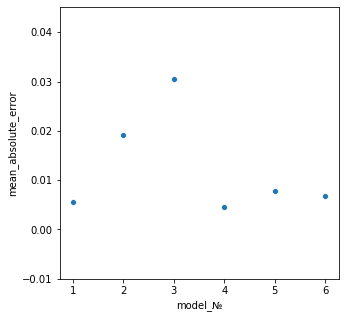

In [228]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='mean_absolute_error', data=dd2)

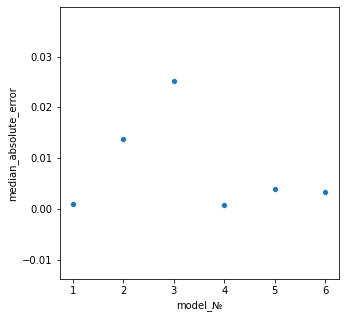

In [229]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='median_absolute_error', data=dd2)

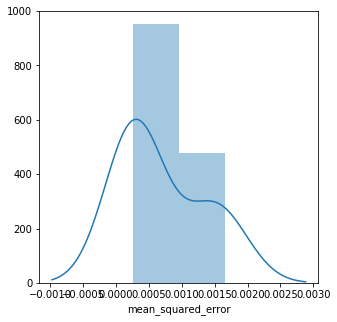

In [230]:
#Гистограмма Позволяет оценить плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['mean_squared_error'])

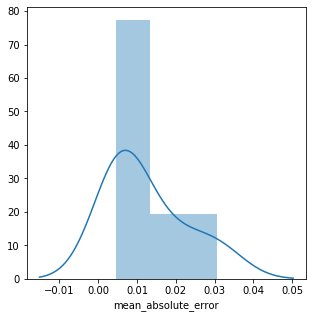

In [231]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['mean_absolute_error'])

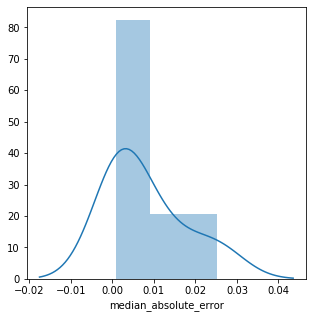

In [232]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['median_absolute_error'])

c:\program files\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


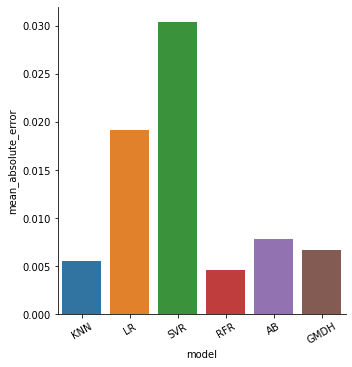

In [233]:
g = sns.factorplot(x='model'
                   ,y= 'mean_absolute_error'
                   ,data=dd2
                   ,kind='bar'
                
                   )
g.set_xticklabels(rotation=30)

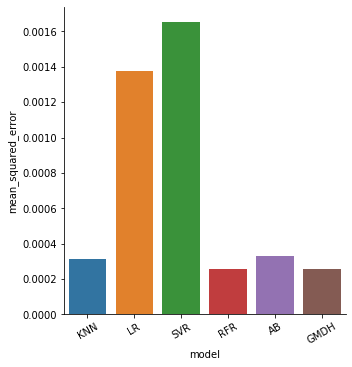

In [234]:
g = sns.factorplot(x='model'
                   ,y= 'mean_squared_error'
                   ,data=dd2
                   ,kind='bar'
                
                   )
g.set_xticklabels(rotation=30)

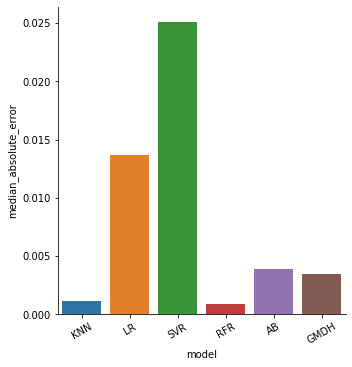

In [235]:
g = sns.factorplot(x='model'
                   ,y= 'median_absolute_error'
                   ,data=dd2
                   ,kind='bar'
                
                   )
g.set_xticklabels(rotation=30)

Вывод: при анализе метрик почти всегда лидирует RandomForestRegressor модель. За ней идут метод K ближайших соседей. В данном слдучае лучше всего использовать RandomForestRegressor модель. Так же можно заметить, что подбор гиперпараметров почти всегда улучшает метрики.